In [1]:
# Импорт библиотек
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Нормализация
])

train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)  # Уменьшенный размер пакета
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:24<00:00, 6.86MB/s] 


In [3]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.hardtanh = nn.Hardtanh()
        self.fc2 = nn.Linear(512, 256)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Разворачиваем изображения в вектор
        x = self.fc1(x)
        x = self.hardtanh(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.hardtanh(x)
        x = self.fc4(x)
        return x

model = NeuralNet()


In [6]:
# 3. Определение функции потерь и оптимизатора
criterion = nn.L1Loss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [8]:
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        # One-hot encode labels для использования L1Loss
        labels_one_hot = torch.zeros(outputs.size()).scatter_(1, labels.view(-1, 1), 1).to(device)
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/100, Loss: 0.1431
Epoch 2/100, Loss: 0.1430
Epoch 3/100, Loss: 0.1430
Epoch 4/100, Loss: 0.1429
Epoch 5/100, Loss: 0.1428
Epoch 6/100, Loss: 0.1422
Epoch 7/100, Loss: 0.1420
Epoch 8/100, Loss: 0.1415
Epoch 9/100, Loss: 0.1410
Epoch 10/100, Loss: 0.1401
Epoch 11/100, Loss: 0.1388
Epoch 12/100, Loss: 0.1379
Epoch 13/100, Loss: 0.1377
Epoch 14/100, Loss: 0.1377
Epoch 15/100, Loss: 0.1376
Epoch 16/100, Loss: 0.1375
Epoch 17/100, Loss: 0.1375
Epoch 18/100, Loss: 0.1376
Epoch 19/100, Loss: 0.1375
Epoch 20/100, Loss: 0.1376
Epoch 21/100, Loss: 0.1374
Epoch 22/100, Loss: 0.1375
Epoch 23/100, Loss: 0.1374
Epoch 24/100, Loss: 0.1375
Epoch 25/100, Loss: 0.1376
Epoch 26/100, Loss: 0.1376
Epoch 27/100, Loss: 0.1375
Epoch 28/100, Loss: 0.1373
Epoch 29/100, Loss: 0.1374
Epoch 30/100, Loss: 0.1375
Epoch 31/100, Loss: 0.1373
Epoch 32/100, Loss: 0.1374
Epoch 33/100, Loss: 0.1374
Epoch 34/100, Loss: 0.1374
Epoch 35/100, Loss: 0.1373
Epoch 36/100, Loss: 0.1373
Epoch 37/100, Loss: 0.1375
Epoch 38/1

KeyboardInterrupt: 

In [21]:
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        labels_one_hot = torch.zeros(outputs.size()).scatter_(1, labels.view(-1, 1), 1)
        loss = criterion(outputs, labels_one_hot)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
test_loss = test_loss / len(test_loader)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

Test Loss: 0.0989, Test Accuracy: 10.00%


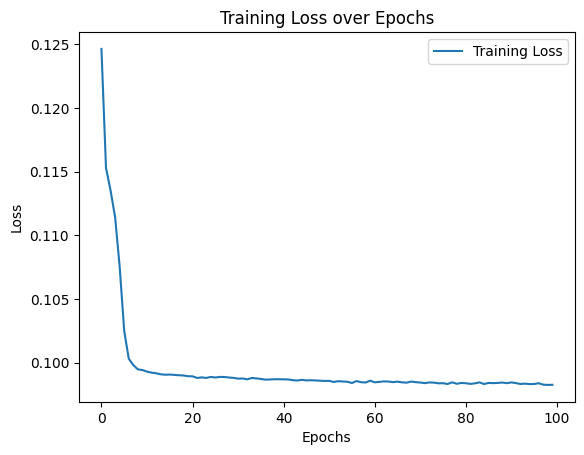

In [22]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()